In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import zipfile
import requests
from io import BytesIO



In [6]:
# URL for the zip file containing the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download and extract the zip file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Assuming the dataset file is 'bank-additional.csv' within the zip file
    with z.open('bank-additional/bank-additional.csv') as f:
        data = pd.read_csv(f, sep=';')

# Display the first few rows of the dataset to verify if it's read correctly
print(data.head())

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [7]:
# Encoding categorical variables if needed
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])  # Encoding the target variable



In [8]:
# Assuming the columns relevant for prediction are defined in 'X'
X = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']]
y = data['y']



In [9]:
# Convert categorical variables to dummy/indicator variables if needed
X = pd.get_dummies(X)



In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)



In [12]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [13]:
# Predict on the test set
y_pred = clf.predict(X_test)



In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8507281553398058


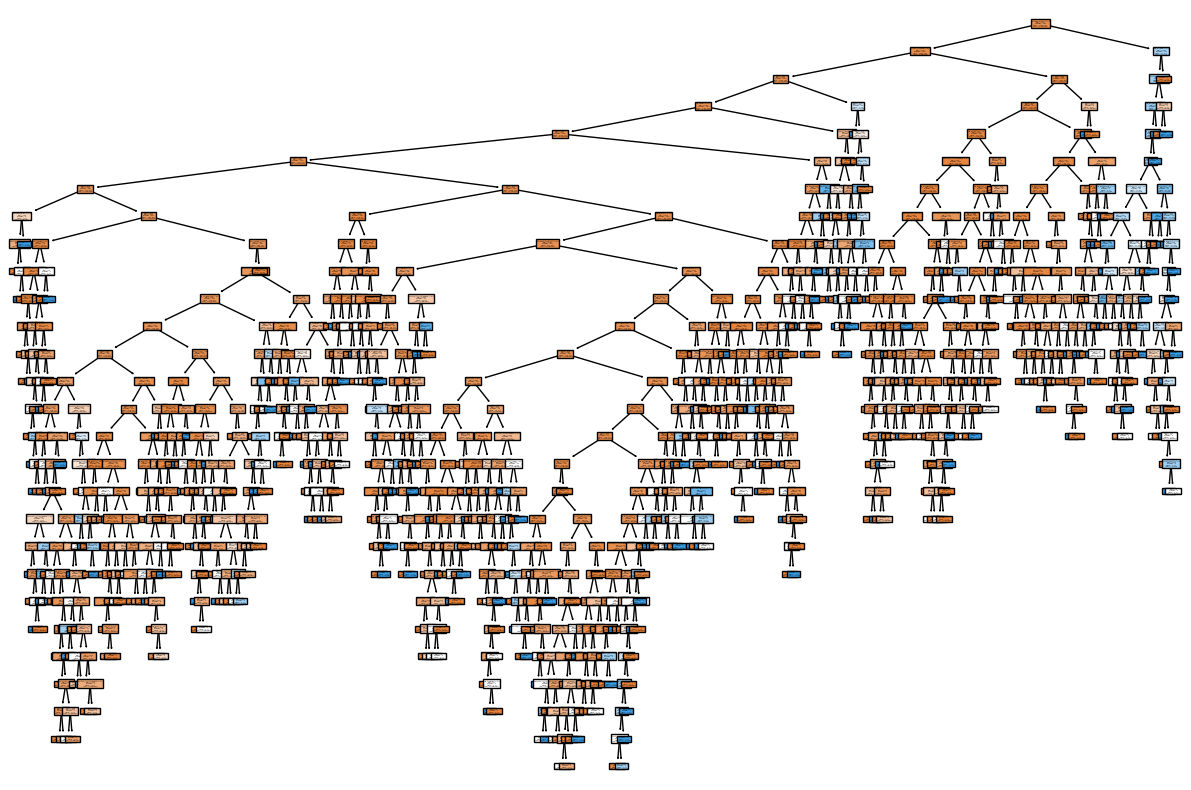

In [15]:
# Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Purchase", "Purchase"])
plt.show()



In [16]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[673  59]
 [ 64  28]]
